In [1]:
import json

import llm as llm

In [ ]:
gpt2_model = llm.get_model('GPT2', model_path='GPT2.pt')

In [4]:
def predict(model, text):
    data = llm.data_preprocess((text), model)
    res = llm.predict(model, data)
    return res

In [5]:
with open('reddit.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

reddit_data = [
    f"{item['title']} {item['body']}" 
    for item in data 
    if item['body'] is not None
]

In [6]:
len(reddit_data)

871

In [7]:
result_gpt2 = []
for reddit in reddit_data:
    result_gpt2.append((reddit,  predict(gpt2_model, reddit)))

In [8]:
classified_results_gpt2 = {"positive": 0, "neutral": 0, "negative": 0}

for gpt2 in result_gpt2:

    gpt2_class = gpt2[1][0]

    if gpt2_class == 0:
        classified_results_gpt2['negative'] += 1
    elif gpt2_class == 1:
        classified_results_gpt2['neutral'] += 1
    elif gpt2_class == 2:
        classified_results_gpt2['positive'] += 1


print("Sentiment Distribution:", classified_results_gpt2)

Sentiment Distribution: {'positive': 287, 'neutral': 115, 'negative': 469}


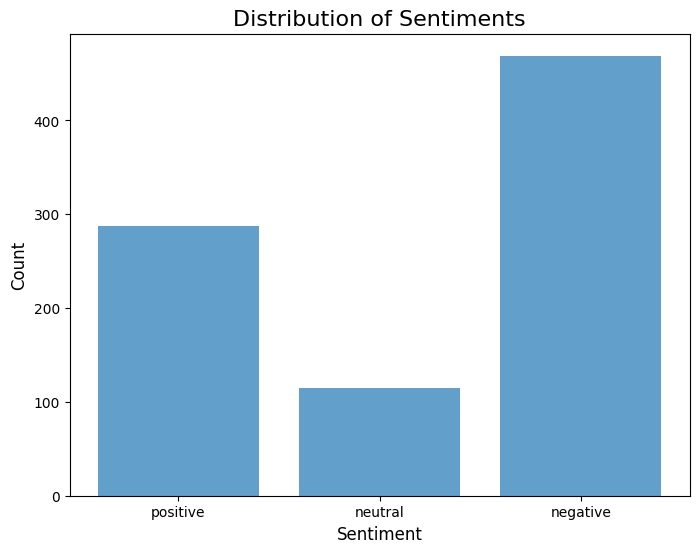

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(classified_results_gpt2.keys(), classified_results_gpt2.values(), alpha=0.7)

plt.title("Distribution of Sentiments", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()
